In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

In [67]:
df = pd.read_csv('/Users/mcrandom/Downloads/mouse_viral_study (2).csv')
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


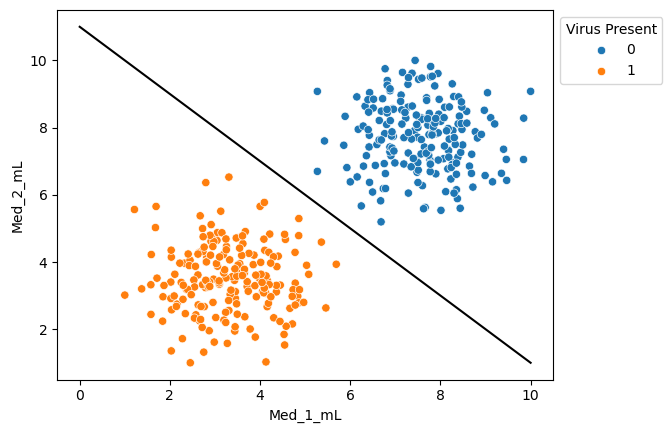

In [69]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')
plt.legend(title='Virus Present', bbox_to_anchor=(1,1))
m = -1
b = 11
x = np.linspace(0,10,100)
y = m*x + b
plt.plot(x, y, 'black')
plt.show()

In [70]:
from sklearn.svm import SVC

X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

svc_model = SVC(kernel='linear', C=1000)
svc_model.fit(X, y)

,C,1000
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [73]:
# CODE SOURCE IS DIRECTLY FROM DOCUMENTATION
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


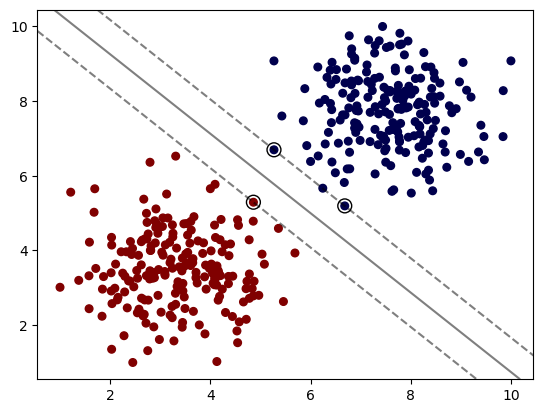

In [75]:
plot_svm_boundary(svc_model, X, y)

In [77]:
svm_model = SVC(kernel='linear', C=0.05)
svm_model.fit(X, y)

,C,0.05
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


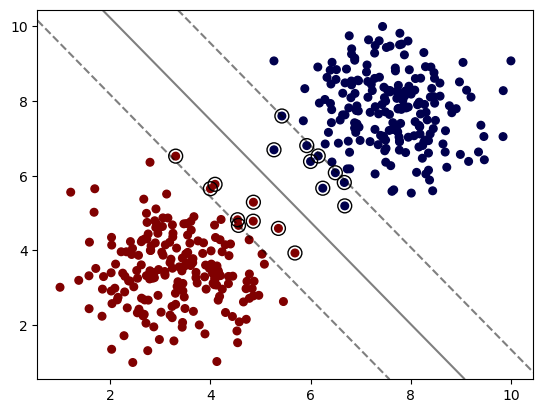

In [79]:
plot_svm_boundary(svm_model, X, y)

In [81]:
rbf_model = SVC(kernel='rbf', C=1)
rbf_model.fit(X,y)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


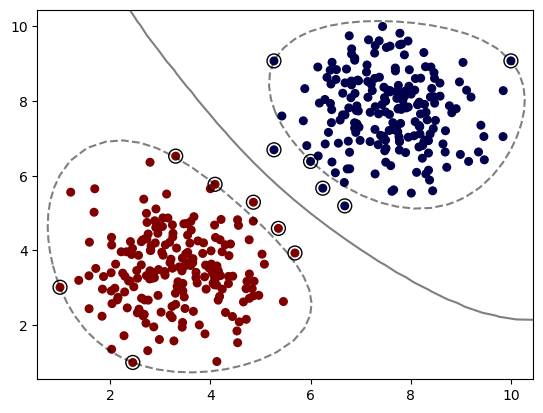

In [83]:
plot_svm_boundary(rbf_model, X, y)

In [85]:
poly_model = SVC(kernel='poly', degree=10, C=1)
poly_model.fit(X, y)

,C,1
,kernel,'poly'
,degree,10
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


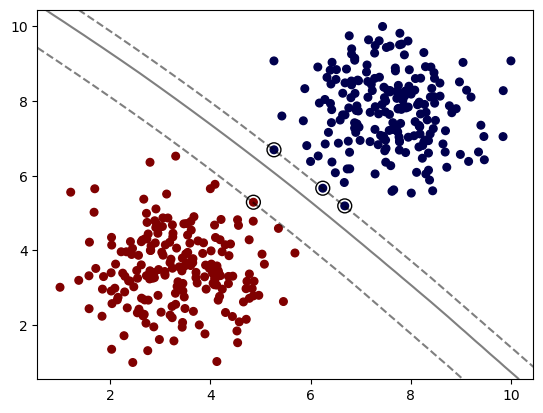

In [87]:
plot_svm_boundary(poly_model, X, y)

In [89]:
from sklearn.model_selection import GridSearchCV

svm = SVC()

param_grid = {
    'C': [0.01, 0.1, 1, 1000], 
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(svm, param_grid)

grid.fit(X, y)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [91]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [93]:
model = SVC(kernel='linear', C=0.01)
model.fit(X, y)

,C,0.01
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


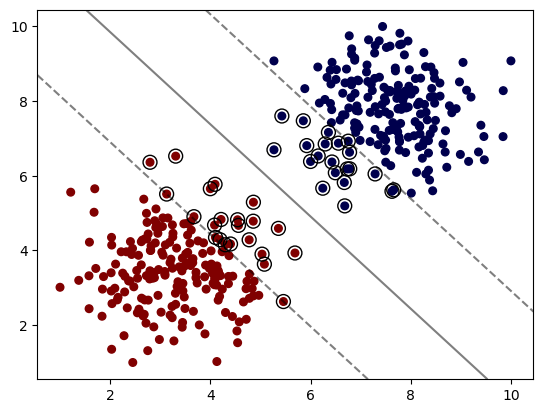

In [95]:
plot_svm_boundary(model, X, y)

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv('/Users/mcrandom/Downloads/mouse_viral_study (2).csv')
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

svm = SVC()

param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(svm, param_grid)
grid.fit(scaled_X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['rbf', 'linear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [103]:
grid.best_params_

{'C': 0.01, 'kernel': 'rbf'}

In [105]:
optimal_svm = SVC(kernel='rbf', C=0.01)
optimal_svm.fit(scaled_X_train, y_train)

,C,0.01
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [107]:
y_pred = optimal_svm.predict(scaled_X_test)

In [109]:
confusion_matrix(y_test, y_pred)

array([[22,  0],
       [ 0, 18]])

In [111]:
accuracy_score(y_test, y_pred)

1.0

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

